In [2]:
# Importing necessary modules

import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# Preprocessing of dataset

train_df = pd.read_csv("../data/loanData.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            904 non-null    int64  
 1   Gender             891 non-null    object 
 2   Married            901 non-null    object 
 3   Dependents         889 non-null    object 
 4   Education          904 non-null    object 
 5   Self_Employed      872 non-null    object 
 6   ApplicantIncome    904 non-null    int64  
 7   CoapplicantIncome  904 non-null    float64
 8   LoanAmount         882 non-null    float64
 9   Loan_Amount_Term   890 non-null    float64
 10  Credit_History     854 non-null    float64
 11  Property_Area      904 non-null    object 
 12  Loan_Status        904 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 91.9+ KB


In [4]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())
train_df['ApplicantIncome'] = train_df['ApplicantIncome'].fillna(train_df['ApplicantIncome'].mean())
train_df['CoapplicantIncome'] = train_df['CoapplicantIncome'].fillna(train_df['CoapplicantIncome'].mean())

train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# dropping null values and ID column
train_df.dropna(inplace = True)
train_df = train_df.drop(columns=["Loan_ID"])

#  dropping redundant values
train_df = train_df.loc[~train_df.duplicated()].reset_index(drop=True).copy()

train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# Size after processing
train_df.shape

(842, 12)

In [7]:
# Converting catagorical values to numeric

numeric_df = train_df.copy()

numeric_df['Loan_Status'].replace('Y',1,inplace=True)
numeric_df['Loan_Status'].replace('N',0,inplace=True)
numeric_df.Gender=numeric_df.Gender.map({'Male':1,'Female':0})
numeric_df.Married=numeric_df.Married.map({'Yes':1,'No':0})
numeric_df.Dependents=numeric_df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
numeric_df.Education=numeric_df.Education.map({'Graduate':1,'Not Graduate':0})
numeric_df.Self_Employed=numeric_df.Self_Employed.map({'Yes':1,'No':0})
numeric_df.Property_Area=numeric_df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

numeric_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,143.208617,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


<Axes: xlabel='Property_Area', ylabel='count'>

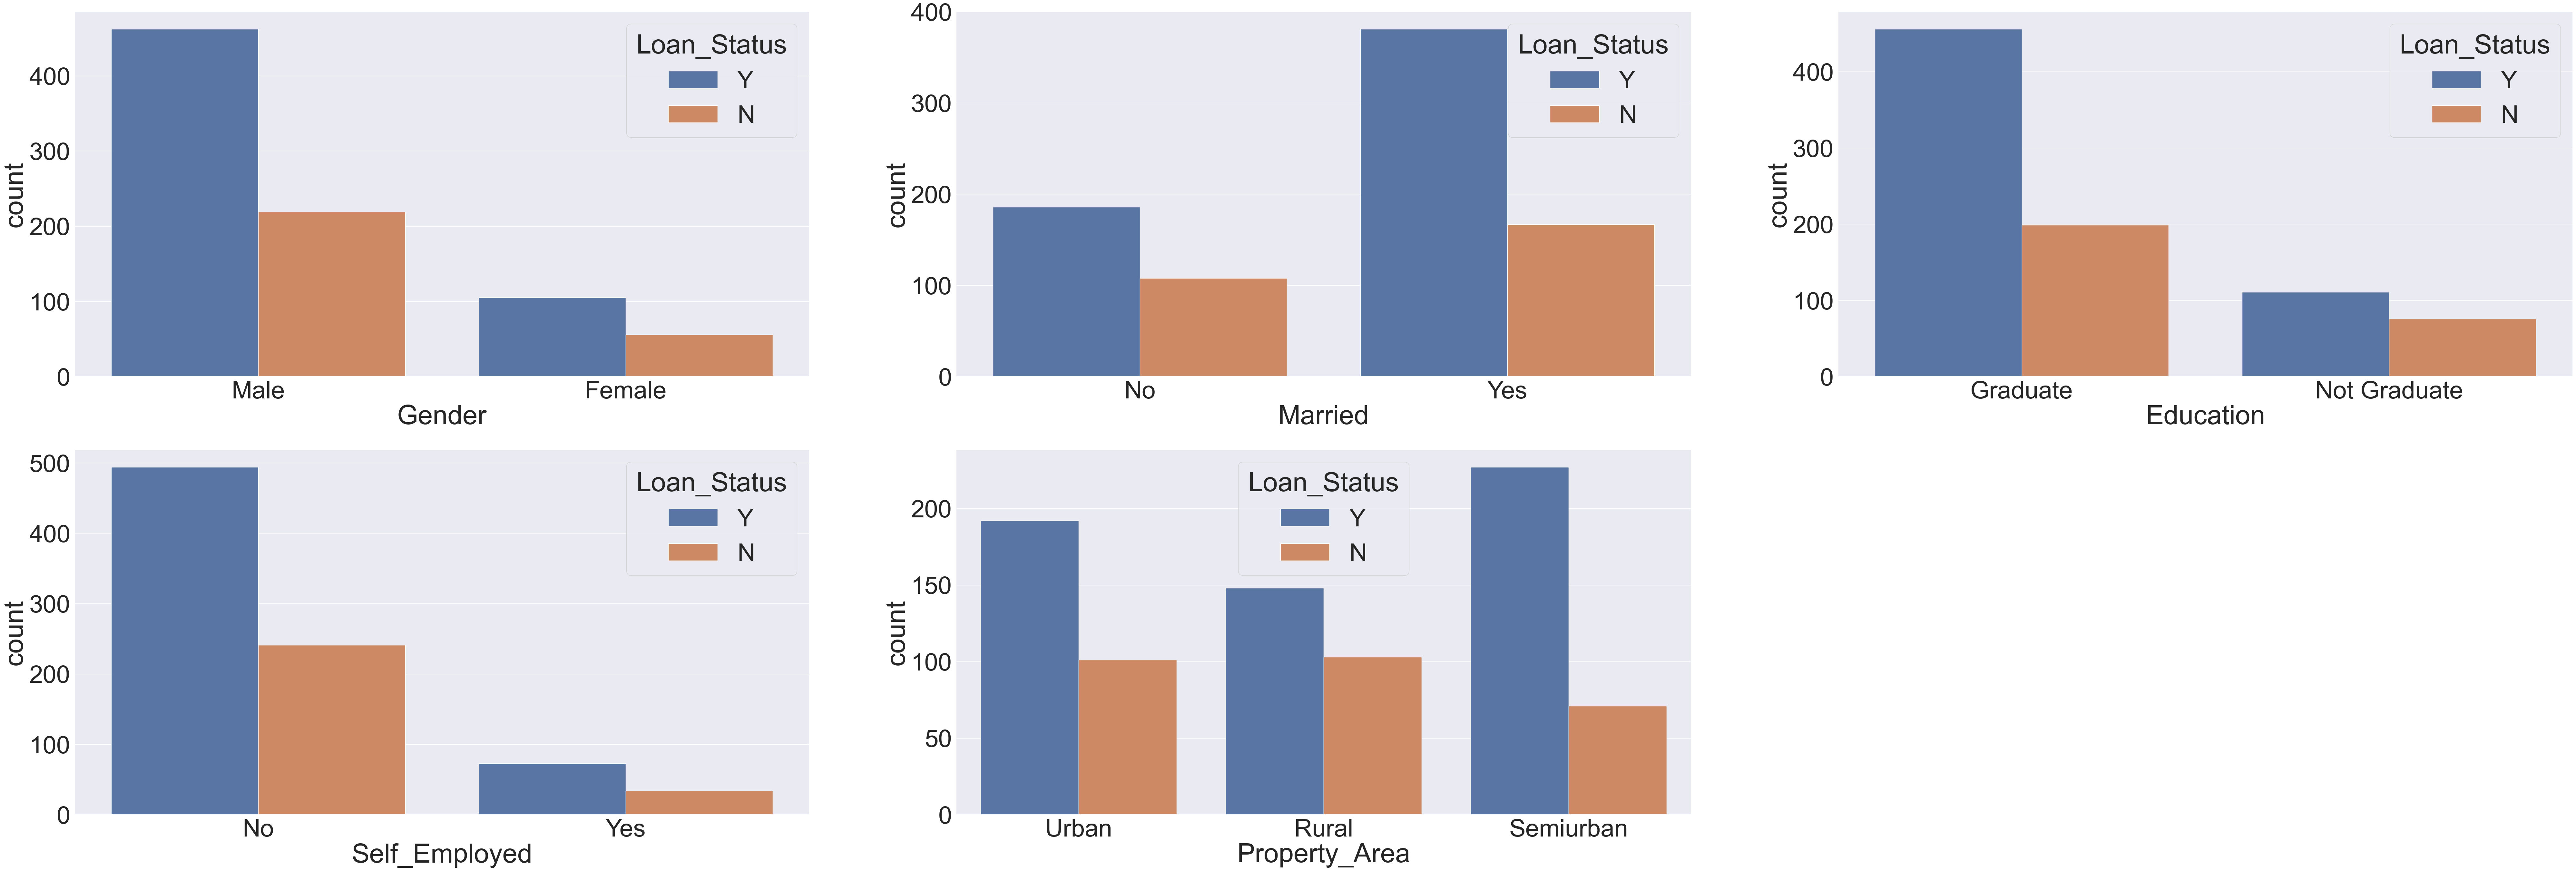

In [8]:
# Exploratory Data Analysis
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(x= train_df['Gender'],hue=train_df['Loan_Status'])

plt.subplot(332)
sns.countplot(x = train_df['Married'],hue=train_df['Loan_Status'])

plt.subplot(333)
sns.countplot(x = train_df['Education'],hue=train_df['Loan_Status'])

plt.subplot(334)
sns.countplot(x = train_df['Self_Employed'],hue=train_df['Loan_Status'])

plt.subplot(335)
sns.countplot(x = train_df['Property_Area'],hue=train_df['Loan_Status'])

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

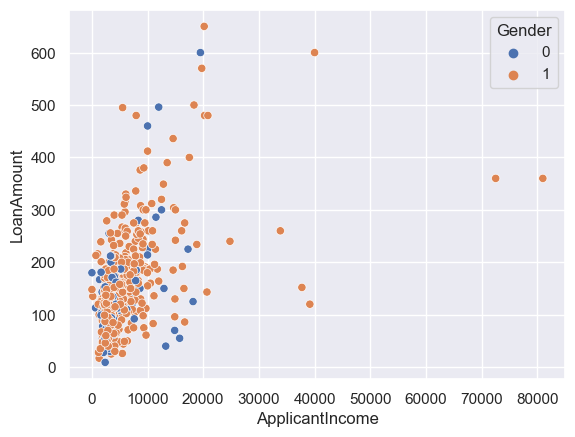

In [9]:
sns.set(font_scale = 1)
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Gender',data=numeric_df)

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

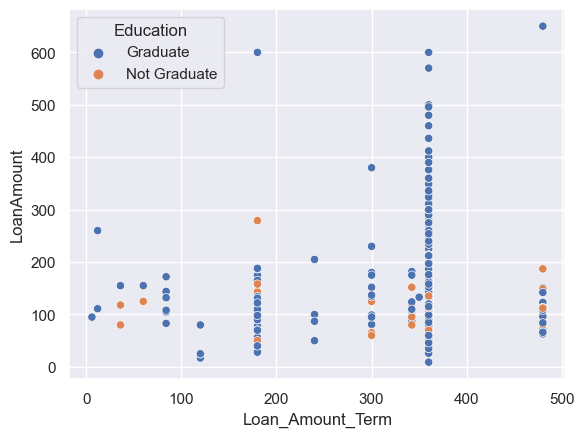

In [10]:
sns.scatterplot(x='Loan_Amount_Term',y='LoanAmount',hue='Education',data=train_df)

In [11]:
numeric_df[['ApplicantIncome'	,'CoapplicantIncome',	'LoanAmount'	,'Loan_Amount_Term'	,'Credit_History']].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.096708,0.494591,0.007729,-0.002570
CoapplicantIncome,-0.096708,1.000000,0.202124,-0.009461,-0.028633
LoanAmount,0.494591,0.202124,1.000000,0.083341,-0.020254
Loan_Amount_Term,0.007729,-0.009461,0.083341,1.000000,0.002194
Credit_History,-0.002570,-0.028633,-0.020254,0.002194,1.000000


In [12]:
# Spliting data
X= numeric_df.drop(columns=["Loan_Status"])
y = numeric_df["Loan_Status"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape


(589, 11)

In [13]:
# Modeling the dataset

# Logistic Regression

l_reg = LogisticRegression(max_iter=1000)
l_reg.fit(X_train,y_train.ravel())

y_pred_log = l_reg.predict(X_test)

print(classification_report(y_test, y_pred_log))

# Accuracy score
print('accuracy is',accuracy_score(y_pred_log,y_test))

l_reg.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        76
           1       0.80      0.98      0.88       177

    accuracy                           0.82       253
   macro avg       0.86      0.71      0.74       253
weighted avg       0.84      0.82      0.79       253

accuracy is 0.8181818181818182


0.7826825127334465

In [14]:
# SVM

svm = SVC()
svm.fit(X_train,y_train.ravel())

y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm,zero_division=0))

# Accuracy score
print('accuracy is',accuracy_score(y_pred_svm,y_test))

svm.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.70      0.99      0.82       177

    accuracy                           0.70       253
   macro avg       0.35      0.50      0.41       253
weighted avg       0.49      0.70      0.57       253

accuracy is 0.6956521739130435


0.6689303904923599

In [15]:
# KNN

knn = KNeighborsClassifier()

knn.fit(X_train,y_train.ravel())

y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn,zero_division=0))

# Accuracy score
print('accuracy is',accuracy_score(y_pred_knn,y_test))

knn.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.37      0.30      0.33        76
           1       0.72      0.78      0.75       177

    accuracy                           0.64       253
   macro avg       0.55      0.54      0.54       253
weighted avg       0.62      0.64      0.62       253

accuracy is 0.6363636363636364


0.7317487266553481

In [43]:
# Stochastic Gradient Descent

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=40)
sgd.fit(X_train,y_train.ravel())

y_pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, y_pred_sgd,zero_division=0))

# Accuracy score
print('accuracy is',accuracy_score(y_pred_sgd,y_test))

sgd.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        76
           1       0.00      0.00      0.00       177

    accuracy                           0.30       253
   macro avg       0.15      0.50      0.23       253
weighted avg       0.09      0.30      0.14       253

accuracy is 0.30039525691699603


0.3378607809847199

In [17]:
# GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train.ravel())

y_pred_gbc = gbc.predict(X_test)


print(classification_report(y_test, y_pred_gbc,zero_division=0))

# Accuracy score
print('accuracy is',accuracy_score(y_pred_gbc,y_test))

gbc.score(X_train,y_train)


              precision    recall  f1-score   support

           0       0.81      0.46      0.59        76
           1       0.80      0.95      0.87       177

    accuracy                           0.81       253
   macro avg       0.81      0.71      0.73       253
weighted avg       0.81      0.81      0.79       253

accuracy is 0.8063241106719368


0.8930390492359932

In [18]:
# GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train.ravel())

y_pred_gbr = gbr.predict(X_test)


print(classification_report(y_test, y_pred_gbr.round(),zero_division=0))

# # Accuracy score
print('accuracy is',accuracy_score(y_pred_gbr.round(),y_test))

gbr.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.83      0.45      0.58        76
           1       0.80      0.96      0.87       177

    accuracy                           0.81       253
   macro avg       0.82      0.70      0.73       253
weighted avg       0.81      0.81      0.79       253

accuracy is 0.8063241106719368


0.6086627758835221

In [19]:
#Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rfc.fit(X_train, y_train.ravel())

y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc.round(), zero_division=0))

#Accuracy
print("accuracy is" ,accuracy_score(y_pred_rfc.round(), y_test))

rfc.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.92      0.45      0.60        76
           1       0.81      0.98      0.89       177

    accuracy                           0.82       253
   macro avg       0.86      0.72      0.74       253
weighted avg       0.84      0.82      0.80       253

accuracy is 0.8221343873517787


0.7792869269949066

In [20]:
# Decision Tree

dt = DecisionTreeClassifier(max_leaf_nodes=3)
dt.fit(X_train, y_train.ravel())

y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt.round(), zero_division=0))

#Accuracy
print("accuracy is" ,accuracy_score(y_pred_dt.round(), y_test))

dt.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.92      0.45      0.60        76
           1       0.81      0.98      0.89       177

    accuracy                           0.82       253
   macro avg       0.86      0.72      0.74       253
weighted avg       0.84      0.82      0.80       253

accuracy is 0.8221343873517787


0.7792869269949066

In [21]:
# XGBoost

xgboost = xgb.XGBClassifier(n_estimators = 10)
xgboost.fit(X_train, y_train.ravel())

y_pred_xgboost = xgboost.predict(X_test)
print(classification_report(y_test, y_pred_xgboost.round(), zero_division=0))

#Accuracy
print("accuracy is" ,accuracy_score(y_pred_xgboost.round(), y_test))

xgboost.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.76      0.45      0.56        76
           1       0.80      0.94      0.86       177

    accuracy                           0.79       253
   macro avg       0.78      0.69      0.71       253
weighted avg       0.79      0.79      0.77       253

accuracy is 0.7905138339920948


0.8845500848896435

In [22]:
# Naive Bayes

naive = GaussianNB()
naive.fit(X_train, y_train.ravel())

y_pred_naive = naive.predict(X_test)


print(classification_report(y_test, y_pred_naive.round(),zero_division=0))

print('accuracy is',accuracy_score(y_pred_naive.round(),y_test))

gbr.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        76
           1       0.81      0.95      0.88       177

    accuracy                           0.81       253
   macro avg       0.81      0.71      0.74       253
weighted avg       0.81      0.81      0.79       253

accuracy is 0.8102766798418972


0.6086627758835221

In [23]:
# Artificial Neural Network

ANN_model = Sequential()
ANN_model.add(Dense(12, input_dim=X.shape[1], activation="relu"))
ANN_model.add(Dense(8, activation="relu"))
ANN_model.add(Dense(1, activation="sigmoid"))
ANN_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
ANN_model.fit(X_train, y_train, epochs=100, batch_size=64)
y_pred_proba = ANN_model.predict(X_test)
y_pred_ANN = (y_pred_proba > 0.5).astype(int)

print(classification_report(y_test, y_pred_ANN.round(),zero_division=0))

print('accuracy is',accuracy_score(y_pred_ANN.round(),y_test))

ANN_model.evaluate(X_train,y_train)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 143.5289 - accuracy: 0.5535
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 95.0389 - accuracy: 0.6316
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 68.5195 - accuracy: 0.5739
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 44.2939 - accuracy: 0.6214
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 20.1800 - accuracy: 0.5756
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 7.0843 - accuracy: 0.6180
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 8.5661 - accuracy: 0.5671
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 7.2901 - accuracy: 0.5959
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 6.7089 - accuracy: 0.6078
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 6.0082 - accuracy: 0.6027
Epo

[2.198657274246216, 0.6621392369270325]